In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ssm_kalman import run_ssm_kalman

In [3]:
X = np.loadtxt('ssm_spins.txt').T
Q_init = np.identity(4)
y_init = np.random.multivariate_normal(np.zeros(4), Q_init)
A = 0.99 * np.array([
    [np.cos(2*np.pi/180), -np.sin(2*np.pi/180), 0, 0],
    [np.sin(2*np.pi/180), np.cos(2*np.pi/180), 0, 0],
    [0, 0, np.cos(2*np.pi/90), -np.sin(2*np.pi/90)],
    [0, 0, np.sin(2*np.pi/90), np.cos(2*np.pi/90)],
])
Q = np.identity(4) - A@A.T
C = np.array([
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 0, 1],
    [0, 0, 1, 1],
    [0.5, 0.5, 0.5, 0.5]
])
R = np.identity(5)

In [32]:
def maximisation(X, Y, V, Vj):

    C_new = (X @ Y.T) @ np.linalg.inv(np.sum(V, axis=0))
    A_new = np.sum(Vj[:-1], axis=0) @ np.linalg.inv(np.sum(V[1:], axis=0))
    R_new = (X @ X.T - (X @ Y.T) @ C_new.T) / (X.shape[1])
    Q_new = (np.sum(V[1:], axis=0) - np.sum(Vj[:-1], axis=0) @ A_new.T) / (X.shape[1]-1)

    return A_new, Q_new, C_new, R_new

In [34]:
n_runs, n_iterations = 5, 10
log_ls_all = list()
Q_init = np.identity(4)
for run in range(n_runs):
    log_ls = list()
    y_init = np.random.multivariate_normal(np.zeros(4), Q_init)
    A = np.random.uniform(size=(4, 4))
    Q = np.random.uniform(size=(4, 4))
    C = np.random.uniform(size=(5, 4))
    R = np.random.uniform(size=(5, 5))
    for iteration in range(n_iterations):
        Y, V, Vj, L = run_ssm_kalman(X, y_init.copy(), Q_init.copy(), A, Q, C, R, mode='smooth')
        A, Q, C, R = maximisation(X, Y, V, Vj)
        # assert np.allclose(Q, Q.T) and np.allclose(R, R.T), f'Q =\n{Q}\nR =\n{R}'
        log_ls.append(np.sum(L))
    log_ls_all.append(log_ls)

C:\Users\Jasraj\AppData\Local\Temp\ipykernel_16296\3327806161.py:5: RuntimeWarning: overflow encountered in matmul
  R_new = (X @ X.T - (X @ Y.T) @ C_new.T) / (X.shape[1])
C:\Users\Jasraj\AppData\Local\Temp\ipykernel_16296\361771552.py:47: RuntimeWarning: invalid value encountered in add
  V_x_pred = C.dot(V_pred.dot(C.T)) + R
c:\Users\Jasraj\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2098: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)


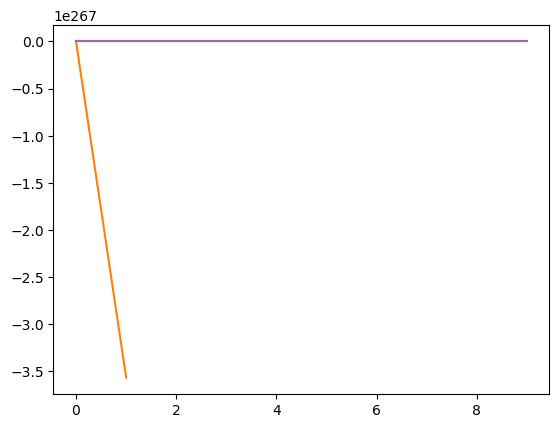

In [35]:
for log_ls in log_ls_all:
    plt.plot(log_ls)
plt.show()